In [65]:
import numpy as np
import matplotlib.pyplot as plt
import json
import math
plt.rcParams.update({'font.size':20})

## Comparing ascending and descending in the multinomial model

In [3]:
with open('../model_output_files/mean_variance_stubbing.json', 'r') as file:
    results = json.load(file)

In [4]:
ns = np.zeros(235)
for i in range(1,100):
    ns[i-1] = i*10
for i in range(1,100):
    ns[98 + i] = i*1000
for i in range(0,37):
    ns[198 + i] = i*25_000 + 100_000

In [30]:
means = np.zeros((2,235))
vars = np.zeros((2,235))
for j in range(2):
    for i in range(235):
        means[j][i] = results[j][i]['mean']
        vars[j][i] = results[j][i]['var']
means = means / (1 + means)
vars = vars / (1 + vars)

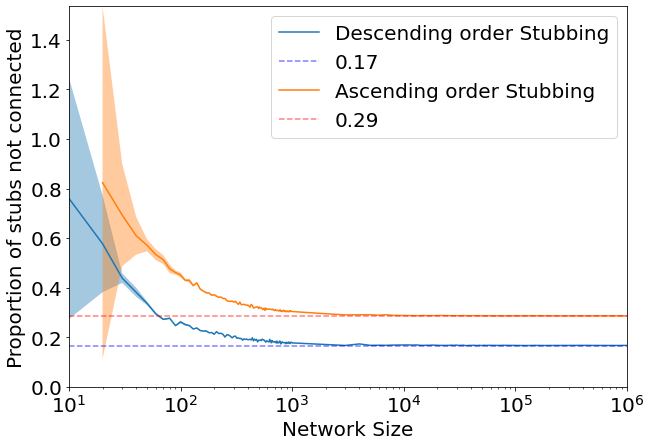

In [34]:
plt.figure(figsize=(10,7))
plt.plot(ns, means[0], label='Descending order Stubbing')
plt.fill_between(ns, means[0] - vars[0], means[0] + vars[0], alpha=0.4)
plt.plot([10,1e6], [min(means[0]), min(means[0])], '--b', alpha = 0.5, label = f'{round(min(means[0]),2)}')
plt.plot(ns, means[1], label='Ascending order Stubbing')
plt.fill_between(ns, means[1] - vars[1], means[1] + vars[1], alpha=0.4)
plt.plot([10,1e6], [min(means[1][1:]), min(means[1][1:])], '--r', alpha = 0.5, label = f'{round(min(means[1][1:]),2)}')
plt.xscale(value='log')
plt.ylabel('Proportion of stubs not connected')
plt.xlabel('Network Size')
# plt.yscale(value='log')
plt.ylim([0,max(means[1][1:]) + max(vars[1][1:])])
plt.xlim([10,1e6])
plt.legend()
plt.show()

## Degree distribution of the multinomial model

In [37]:
with open('../model_output_files/network_multi_1.json', 'r') as file:
    network_multi_1 = json.load(file)
with open('../model_output_files/network_multi_2.json', 'r') as file:
    network_multi_2 = json.load(file)
with open('../model_output_files/network_sbm_1.json', 'r') as file:
    network_sbm_1 = json.load(file)
with open('../model_output_files/network_sbm_2.json', 'r') as file:
    network_sbm_2 = json.load(file) 

### Period 1

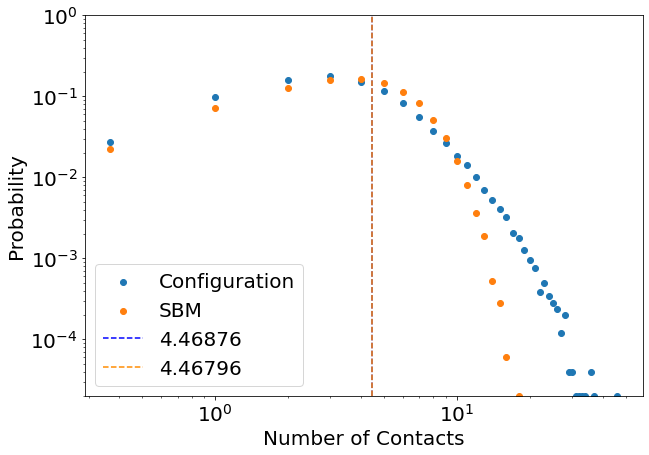

In [71]:
unique1 = np.unique(np.array(network_multi_1['degree']),return_counts=True)
unique2 = np.unique(np.array(network_sbm_1['degree']),return_counts=True)
unique1_vals = np.array([float(a) for a in unique1[0]])
unique1_vals[0] = 1/math.e
unique2_vals = np.array([float(a) for a in unique2[0]])
unique2_vals[0] = 1/math.e
plt.figure(figsize=(10,7))
ax = plt.gca()
ax.scatter(unique1_vals, unique1[1]/sum(unique1[1]), label="Configuration")
ax.scatter(unique2_vals, unique2[1]/sum(unique2[1]), label="SBM")
ax.axvline(x=np.mean(network_multi_1['degree']), color='blue', linestyle='--', label=f'{np.mean(network_multi_1["degree"])}')
ax.axvline(x=np.mean(network_sbm_1['degree']), color='darkorange', linestyle='--', label=f'{np.mean(network_sbm_1["degree"])}')
ax.set_ylim([min(unique1[1]/sum(unique1[1])),1])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel("Probability")
ax.set_xlabel("Number of Contacts")
ax.legend()
# plt.savefig("../../../figures/random_graph_model_figs/degree_dist_comparison1.png")
plt.show()

### Period 2 

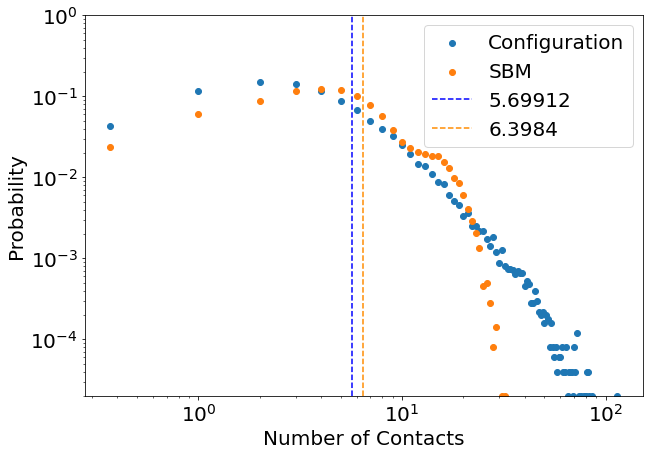

In [70]:
unique1 = np.unique(np.array(network_multi_2['degree']),return_counts=True)
unique2 = np.unique(np.array(network_sbm_2['degree']),return_counts=True)
unique1_vals = np.array([float(a) for a in unique1[0]])
unique1_vals[0] = 1/math.e
unique2_vals = np.array([float(a) for a in unique2[0]])
unique2_vals[0] = 1/math.e
plt.figure(figsize=(10,7))
ax = plt.gca()
ax.scatter(unique1_vals, unique1[1]/sum(unique1[1]), label="Configuration")
ax.scatter(unique2_vals, unique2[1]/sum(unique2[1]), label="SBM")
ax.axvline(x=np.mean(network_multi_2['degree']), color='blue', linestyle='--', label=f'{np.mean(network_multi_2["degree"])}')
ax.axvline(x=np.mean(network_sbm_2['degree']), color='darkorange', linestyle='--', label=f'{np.mean(network_sbm_2["degree"])}')
ax.set_ylim([min(unique1[1]/sum(unique1[1])),1])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel("Probability")
ax.set_xlabel("Number of Contacts")
ax.legend()
# plt.savefig("../../../figures/random_graph_model_figs/degree_dist_comparison1.png")
plt.show()